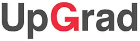

##### Learning Objectives (Open CV) 

- Learn about Open CV library
- What is an Image and how to manipulate images
- Some key functionalities avaialable within the library
- Look at some real world applications using Image processing algorithms such as Edge detection contour detection etc.

In [ ]:
!pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os

cv2.__version__

'4.5.1'

In [47]:
# gray scale images
img = cv2.imread("files/sachin_gray_scale.jpg",cv2.IMREAD_GRAYSCALE)
img.shape

(206, 160)

In [48]:
img

array([[119, 119, 119, ..., 118, 117, 117],
       [118, 118, 118, ..., 117, 117, 117],
       [118, 118, 118, ..., 117, 117, 117],
       ...,
       [ 90,  88,  94, ..., 125, 125, 124],
       [ 89,  89,  93, ..., 126, 126, 125],
       [ 91,  89,  90, ..., 126, 127, 126]], dtype=uint8)

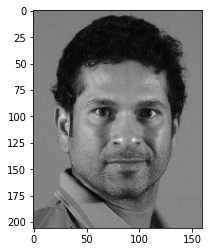

In [49]:
plt.imshow(img,cmap="gray")

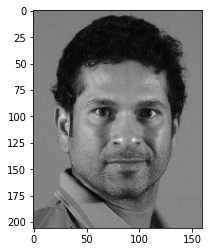

In [50]:
img+=10
plt.imshow(img,cmap="gray")

In [51]:
# write array to excel file
temp = pd.DataFrame(img)
temp.to_excel("files/Sachin_Image_excel.xlsx",index=False)

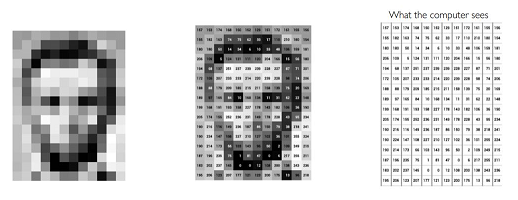

In [16]:
## Reading a color image
img = cv2.imread("files/sachin_color.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

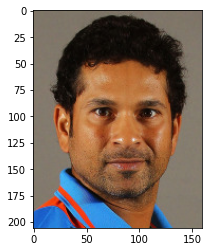

In [17]:
plt.imshow(img)

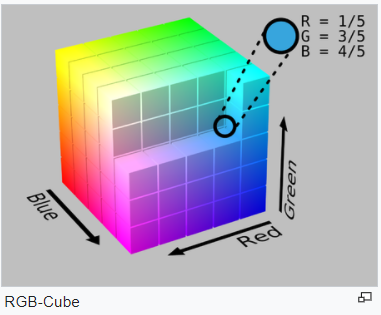

HSL (hue, saturation, lightness) and HSV (hue, saturation, value, also known as HSB or hue, saturation, brightness) are alternative representations of the RGB color model

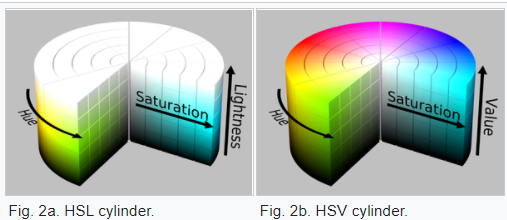

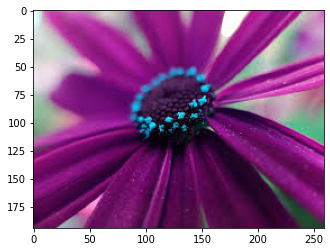

In [29]:
### HSV color format
red1 = cv2.imread("DEMO/sample.png")
red1_hsv = cv2.cvtColor(red1,cv2.COLOR_RGB2HSV)
plt.imshow(cv2.cvtColor(red1_hsv,cv2.COLOR_HSV2RGB))

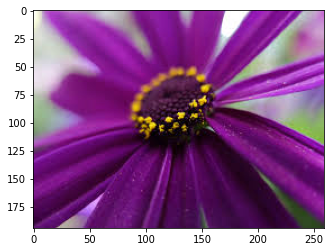

In [28]:
### HSV color format
red1 = cv2.imread("DEMO/sample.png")
red1_hsv = cv2.cvtColor(red1,cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(red1_hsv,cv2.COLOR_HSV2RGB))

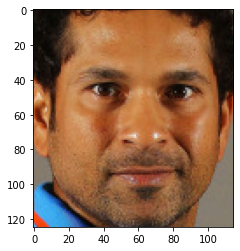

In [33]:
plt.imshow(img[50:175,25:140,:])

#### Image Histograms 

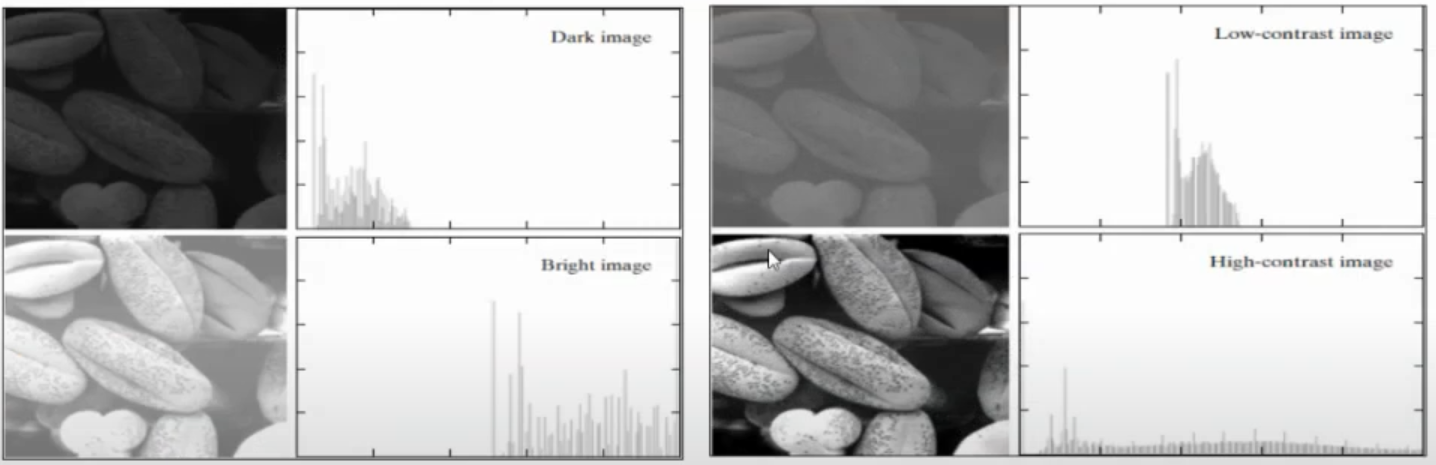

In [34]:
# image historgrams
img_low_contrast = cv2.imread("files/sachin_color.jpg",cv2.IMREAD_GRAYSCALE)
img_hist = cv2.calcHist(img_low_contrast,[0],None,[30],[0,255])

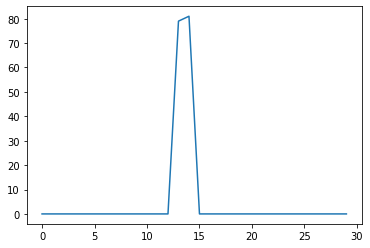

In [35]:
plt.plot(img_hist)

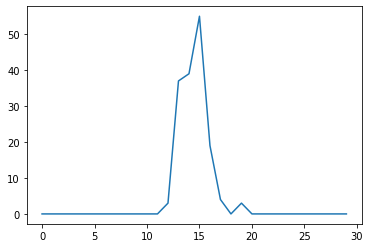

In [36]:
img_contrast_corrected = cv2.equalizeHist(img_low_contrast)
img_hist_corrected = cv2.calcHist(img_contrast_corrected,[0],None,[30],[0,255])
plt.plot(img_hist_corrected)

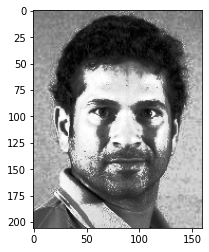

In [37]:
plt.imshow(img_contrast_corrected,cmap="gray")

In [52]:
# Open a sample video available in sample-videos
vcap = cv2.VideoCapture(r'files/sample_video.mp4')
count = 0

In [53]:
# frames per second
vcap.get(cv2.CAP_PROP_FPS)

25.0

In [54]:
length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

2053


In [55]:
ret, frame = vcap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

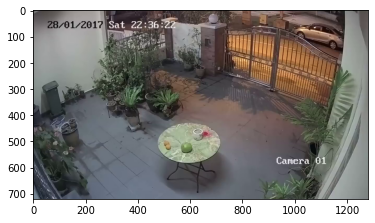

In [57]:
plt.imshow(frame)

In [58]:
# Open a sample video available in sample-videos
vcap = cv2.VideoCapture(r'files/sample_video.mp4')

# read every nth frame
count=0
frame_num = []
while vcap.isOpened():
    ret, frame = vcap.read()
    if ret:
        frame_count = "frame_" + str(count) + ".jpg"
        cv2.imwrite(os.path.join('frames', frame_count), frame)
        frame_num.append(frame_count)
        count += 60
        vcap.set(1, count)
    else:
        vcap.release()
        break

In [60]:
all_imgs = [cv2.cvtColor(cv2.imread(os.path.join("frames",x)), cv2.COLOR_BGR2GRAY)
            for x in frame_num]

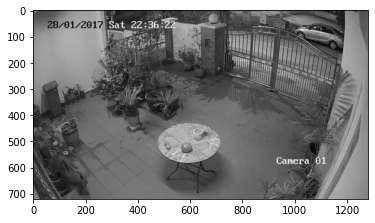

In [61]:
plt.imshow(all_imgs[0],cmap='gray')

In [62]:
for i in range(len(all_imgs)):
    all_imgs[i][0:350,700:1280] = 0
    all_imgs[i][0:100,0:700] = 0

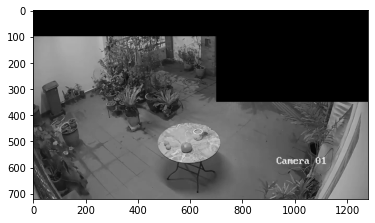

In [63]:
plt.imshow(all_imgs[0],cmap='gray')

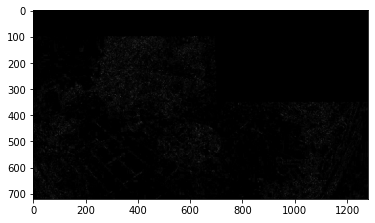

In [65]:
diff = cv2.subtract(all_imgs[0],all_imgs[1])
plt.imshow(diff,cmap='gray')

In [66]:
diff_from_ref = []
for i in range(1,len(all_imgs)):
    diff = all_imgs[i-1] - all_imgs[i]
    kernel = np.ones((10,10),np.uint8)
    diff_dilated = cv2.erode(diff,kernel,200)
    diff_from_ref.append(np.sum(diff_dilated > 0)/(diff.shape[0]*diff.shape[1]))

In [67]:
res = pd.DataFrame({"frame":frame_num[1:],"diff":diff_from_ref})
res.sort_values(by="diff",ascending=False)

,frame,diff
33,frame_2040.jpg,0.045093
32,frame_1980.jpg,0.014145
11,frame_720.jpg,0.011866
12,frame_780.jpg,0.008982
13,frame_840.jpg,0.006308
14,frame_900.jpg,0.004215
16,frame_1020.jpg,0.003737
21,frame_1320.jpg,0.003587
17,frame_1080.jpg,0.003328
25,frame_1560.jpg,0.003299


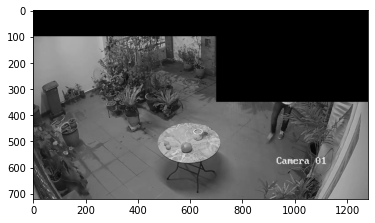

In [71]:
plt.imshow(all_imgs[33],cmap="gray")

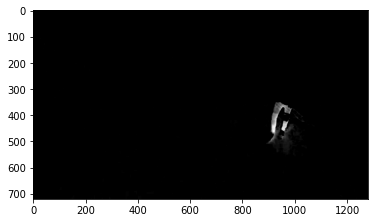

In [76]:
img_id = 33
diff = cv2.subtract(all_imgs[32],  all_imgs[img_id])
kernel = np.ones((5,5),np.uint8)
diff_dilated = cv2.erode(diff,kernel,12)
plt.imshow(diff_dilated,cmap="gray")

#### Morphological Operations
- In short: A set of operations that process images based on shapes. Morphological operations apply a structuring element to an input image and generate an output image.
- The most basic morphological operations are: Erosion and Dilation.
- They have a wide array of uses, i.e. :
1. Removing noise
2. Isolation of individual elements and joining disparate elements in an image.
3. Finding of intensity bumps or holes in an image

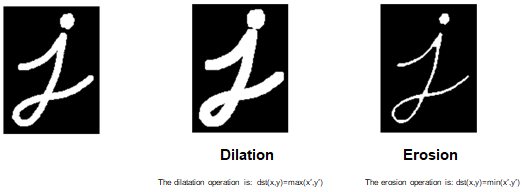`

### Canny Edge Detection

- Here we find the edge by taking the gradient of the image, We perform a 2-D spatial mesurement on an image
- Usually pair of 3 X 3 convolution mask one estimating the gradient in the x-direction and the other estimating the gradient in the y-direction.

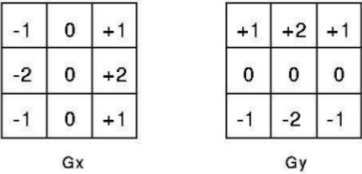
https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

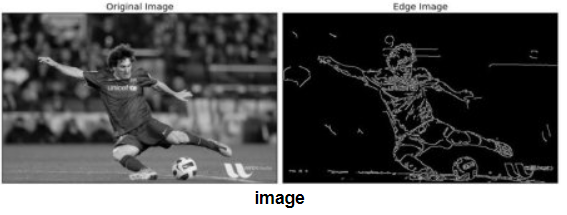

In [94]:
img = cv2.imread("files/car_num_plate.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray_img = cv2.GaussianBlur(gray_img,(3,3),0)

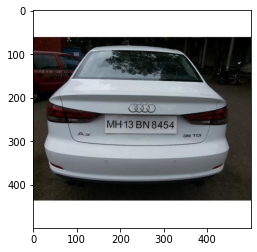

In [95]:
plt.imshow(img_rgb)

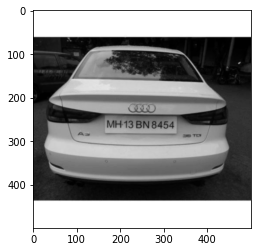

In [96]:
plt.imshow(gray_img,cmap='gray')

In [105]:
## 
edged = cv2.Canny(gray_img,10,200)

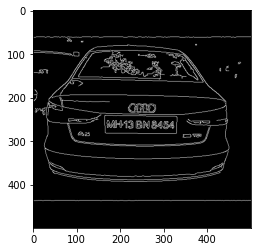

In [106]:
# edged=255-edged
plt.imshow(edged,cmap='gray')

In [107]:
edged = cv2.Canny(gray_img,10,200)
contours,_ = cv2.findContours(edged,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [108]:
len(contours)

128

### Contours

###### Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

#### Contour Approximation

It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm.

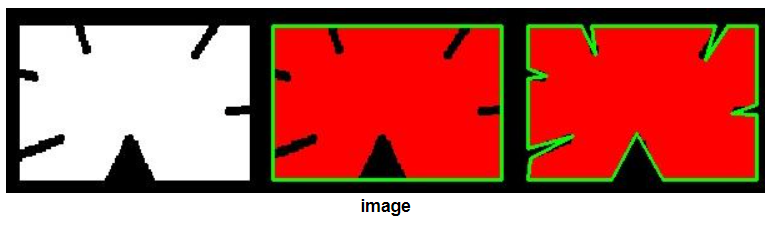

https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html

In [109]:
rect_contours = []
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*peri, True)
 
    if len(approx) == 4:
        rect_contours.append(approx)
        break

In [111]:
len(rect_contours)

1

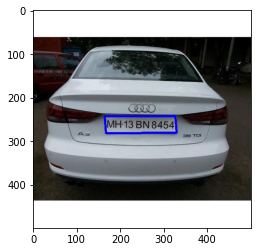

In [112]:
plt.imshow(cv2.drawContours(img_rgb, [rect_contours[0]], -1, (0, 0, 255), 3))

In [116]:
mask = np.zeros(gray_img.shape,np.uint8)
mask = cv2.drawContours(mask,[rect_contours[0]],contourIdx=0, color=255,thickness=-1)

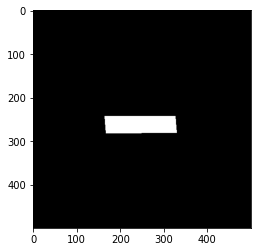

In [117]:
plt.imshow(mask,cmap='gray')

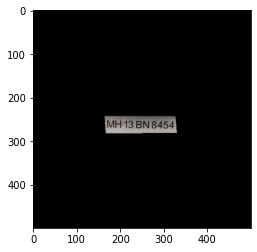

In [119]:
num_plate = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(num_plate,cmap='gray')

In [120]:
(x, y) = np.where(mask == 255)
(top_x, top_y) = (np.min(x), np.min(y))
(bottom_x, bottom_y) = (np.max(x), np.max(y))
cropped_num_plate = img[top_x:bottom_x+1, top_y:bottom_y+1]

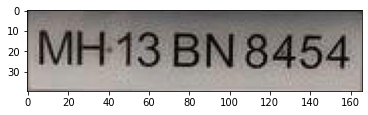

In [121]:
plt.imshow(cropped_num_plate)